# Data exploration of smoking.csv dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
train = pd.read_csv("data/train_data.csv")
train.head(5)

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,ALT,Gtp,dental caries,tartar,smoking,bmi,healthy weight,eyesight_total,vision,hearing_impairment
0,1,25,170,75,89.0,1.0,1.0,1.0,1.0,110.0,...,53.0,61.0,1,1,1,25.95,1.0,2.0,1,0
1,1,50,170,85,90.0,1.2,1.2,1.0,1.0,115.0,...,47.0,44.0,0,1,1,29.41,1.0,2.4,1,0
2,0,45,150,60,81.2,0.6,0.5,1.0,1.0,121.0,...,57.0,36.0,0,1,0,26.67,1.0,1.1,1,0
3,1,45,160,65,87.0,1.0,1.2,1.0,1.0,133.0,...,52.0,61.0,0,1,1,25.39,1.0,2.2,1,0
4,1,40,180,80,86.0,1.2,0.9,1.0,1.0,112.0,...,16.0,31.0,0,1,1,24.69,0.0,2.1,1,0


gender                 0.510643
age                   -0.158847
height(cm)             0.395006
weight(kg)             0.303082
waist(cm)              0.225643
eyesight(left)         0.088285
eyesight(right)        0.098459
hearing(left)         -0.021213
hearing(right)        -0.018393
systolic               0.073736
relaxation             0.108124
fasting blood sugar    0.100949
Cholesterol           -0.027766
triglyceride           0.253933
HDL                   -0.179716
LDL                   -0.045241
hemoglobin             0.401821
Urine protein          0.015249
serum creatinine       0.220852
AST                    0.059557
ALT                    0.092480
Gtp                    0.240740
dental caries          0.103338
tartar                 0.095967
smoking                1.000000
bmi                    0.108064
healthy weight         0.069673
eyesight_total         0.101586
vision                -0.073636
hearing_impairment    -0.022088
Name: smoking, dtype: float64

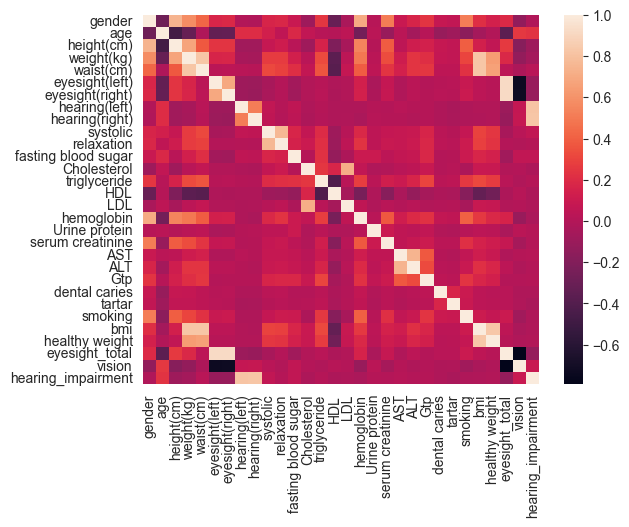

In [3]:
corr = train.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
display(corr["smoking"])

In [4]:
def bar_chart(train_data, feature):
    smoking = train_data[train_data['smoking']==1][feature].value_counts()
    not_smoking = train_data[train_data['smoking']==0][feature].value_counts()
    df = pd.DataFrame([smoking, not_smoking])
    df.index = ['Smoking', 'Not Smoking']
    df.plot(kind='bar', stacked=True, figsize=(10, 5))

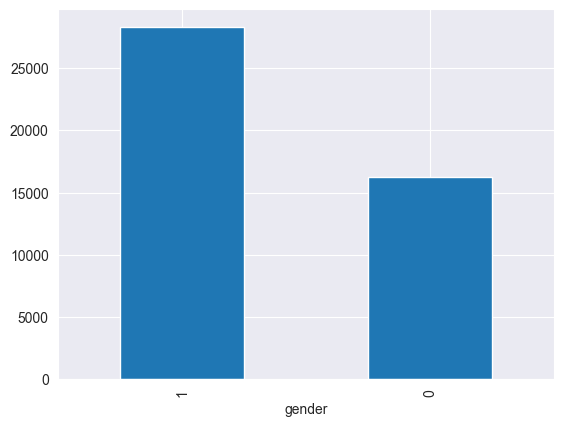

In [5]:
bar = train["gender"].value_counts().plot(kind="bar")

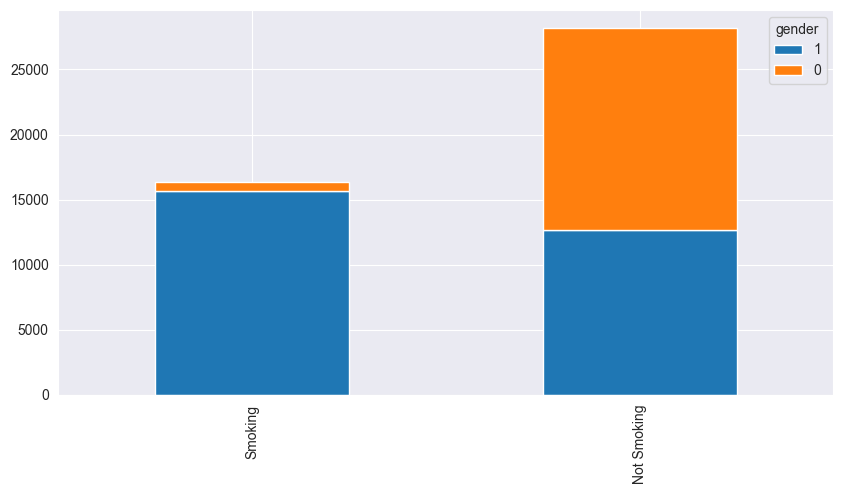

In [6]:
bar_chart(train, "gender")

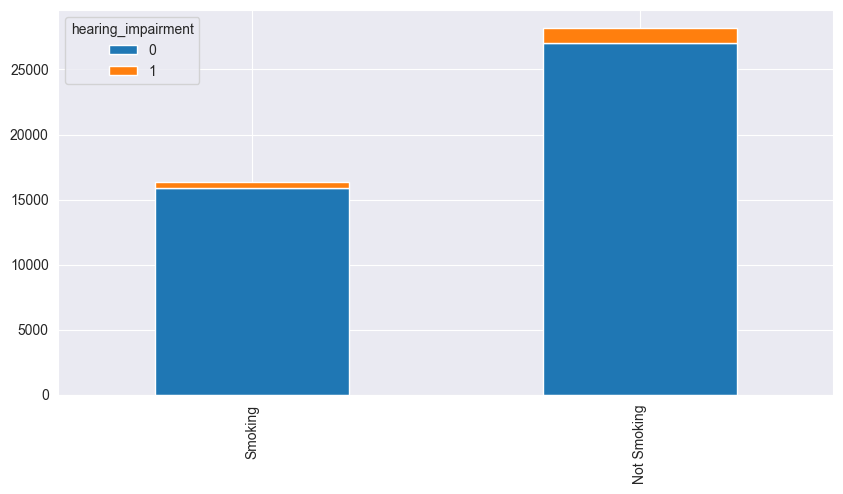

In [7]:
bar_chart(train, "hearing_impairment")

choosing two variables with the highest correlation with target variable:

<Axes: xlabel='weight(kg)', ylabel='hemoglobin'>

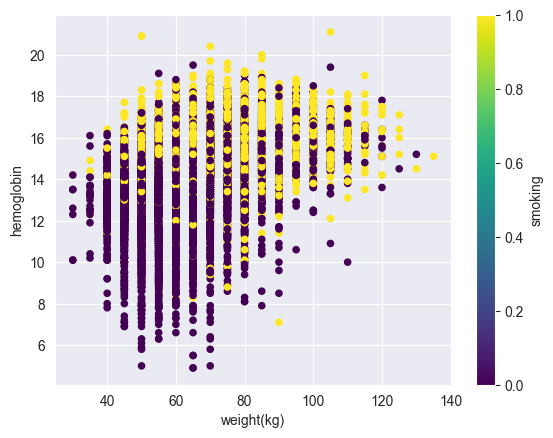

In [25]:
train.plot.scatter(x = 'weight(kg)',
                   y = 'hemoglobin',
                   c = 'smoking',
                   colormap = 'viridis')